# Developers
- Namous Nassim
- Souita Ikram
- Benfaddoul Fahd

# Dataset
[Brain Tumor MRI Dataset](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
import os

In [2]:
train = '../data/Training'
test = '../data/Testing'

In [3]:
categories = ['glioma','meningioma','notumor','pituitary']
counts = {}

for category in categories:
    cat_path = os.path.join(train, category)
    if os.path.exists(cat_path):
        img_num = len(os.listdir(cat_path))
        counts[category] = img_num
    else:
        print(f'Chemin {cat_path} n\'existe pas')
    
print("Nombre d'images par catégorie : ", counts)
for category , n in counts.items():
    print(f'{category} : {n} images')
    
   

Nombre d'images par catégorie :  {'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}
glioma : 1321 images
meningioma : 1339 images
notumor : 1595 images
pituitary : 1457 images


In [4]:
## Visualising Number of Images in Each Category

fig = go.Figure()

# Add bar chart with labels
fig.add_trace(go.Bar(
    x=list(counts.keys()),
    y=list(counts.values()),
    marker_color=['blue', 'green', 'red', 'purple'],
    text=list(counts.values()),  # Add labels
    textposition='auto'  # Display labels on top of the bars
))

# Customize layout
fig.update_layout(
    title="Image Distribution by Category",
    xaxis_title="Category",
    yaxis_title="Number of Images",
    xaxis_tickangle=20,
    font=dict(size=12),
    yaxis=dict(gridcolor='rgba(127,127,127,0.3)')  # Add gridlines
) 


In [5]:
import os
from tqdm import tqdm
from PIL import Image



image_sizes = []

# Function to collect image sizes from a directory with a progress bar
def collect_image_sizes(directory):
    # Loop through files with a progress bar
    for root, dirs, files in tqdm(os.walk(directory), desc=f"Processing {directory}"):
        for file in files:
            if file.endswith('.jpg'):
                image_path = os.path.join(root, file)
                img = Image.open(image_path)
                # Append the (width, height) to the list
                image_sizes.append(img.size)

# Collect image sizes from both the training and testing directories
collect_image_sizes(train)
collect_image_sizes(test)

# Convert image sizes to a NumPy array for easy manipulation
resolutions = np.array(image_sizes)

# Create a scatter plot figure with Plotly
fig = px.scatter(
    x=resolutions[:, 0],
    y=resolutions[:, 1],
    title="Distribution of Image Resolutions",
    labels={"x": "Width (pixels)", "y": "Height (pixels)"},
    hover_name=[f"{w}x{h}" for w, h in resolutions]
)

# Customize the plot
fig.update_layout(
    showlegend=False,
    hovermode="closest",
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=50, t=50, pad=4)
)

Processing ../data/Training: 5it [00:56, 11.32s/it]
Processing ../data/Testing: 5it [00:11,  2.37s/it]


# Conclusion
Le jeu de données souffre d'un déséquilibre des classes, la classe "no_tumor" étant sous-représentée.
Les images du jeu de données varient en taille, nécessitant une standardisation.

# Solutions
- **Augmentation de Données**: Appliquer des techniques telles que la rotation, le retournement et le zoom pour augmenter la représentation des catégories sous-représentées.
- **Redimensionnement des Images**: Normaliser toutes les images à une taille cohérente pour un traitement uniforme.

In [9]:
import cv2 
from tqdm import tqdm
import os

img_size = 224 # 224x224 pixels
def resize_save(input_dir,output_dir,img_size,catgeroies):
    os.makedirs(output_dir,exist_ok=True)

    for category in categories:
        category_dir = os.path.join(output_dir,category)
        os.makedirs(category_dir,exist_ok=True)
        folderPath = f'{input_dir}/{category}'

        for file in tqdm(os.listdir(folderPath) , desc=f"Process {category}"):
            img_path = f'{folderPath}/{file}'
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.resize(img,(img_size,img_size))
                cv2.imwrite(f'{category_dir}/{file}', img)
    print(f"Images resized and saved in {output_dir}")

train_data_rezsized = 'resized_data/Training'
test_data_resized = 'resized_data/Testing'

resize_save(train,train_data_rezsized,img_size,categories)


Process glioma:   0%|          | 0/1321 [00:00<?, ?it/s]

Process pituitary: 100%|██████████| 1457/1457 [00:07<00:00, 204.50it/s]

Images resized and saved in resized_data/Training


In [10]:
resize_save(test,test_data_resized,img_size,categories)

Process pituitary: 100%|██████████| 300/300 [00:01<00:00, 236.96it/s]

Images resized and saved in resized_data/Testing


In [11]:
image_sizes = []

collect_image_sizes(train_data_rezsized)
collect_image_sizes(test_data_resized)
resolutions = np.array(image_sizes)

fig = px.scatter(
x=resolutions[:, 0],
y=resolutions[:, 1],
title="Distribution of Image Resolutions",
labels={"x": "Width (pixels)", "y": "Height (pixels)"},
hover_name=[f"{w}x{h}" for w, h in resolutions]
)

fig.update_layout(
showlegend=False,
hovermode="closest",
width=800,
height=600,
margin=dict(l=50, r=50, b=50, t=50, pad=4)
)

fig.show()

Processing resized_data/Training: 5it [00:43,  8.70s/it]
Processing resized_data/Testing: 5it [00:11,  2.28s/it]


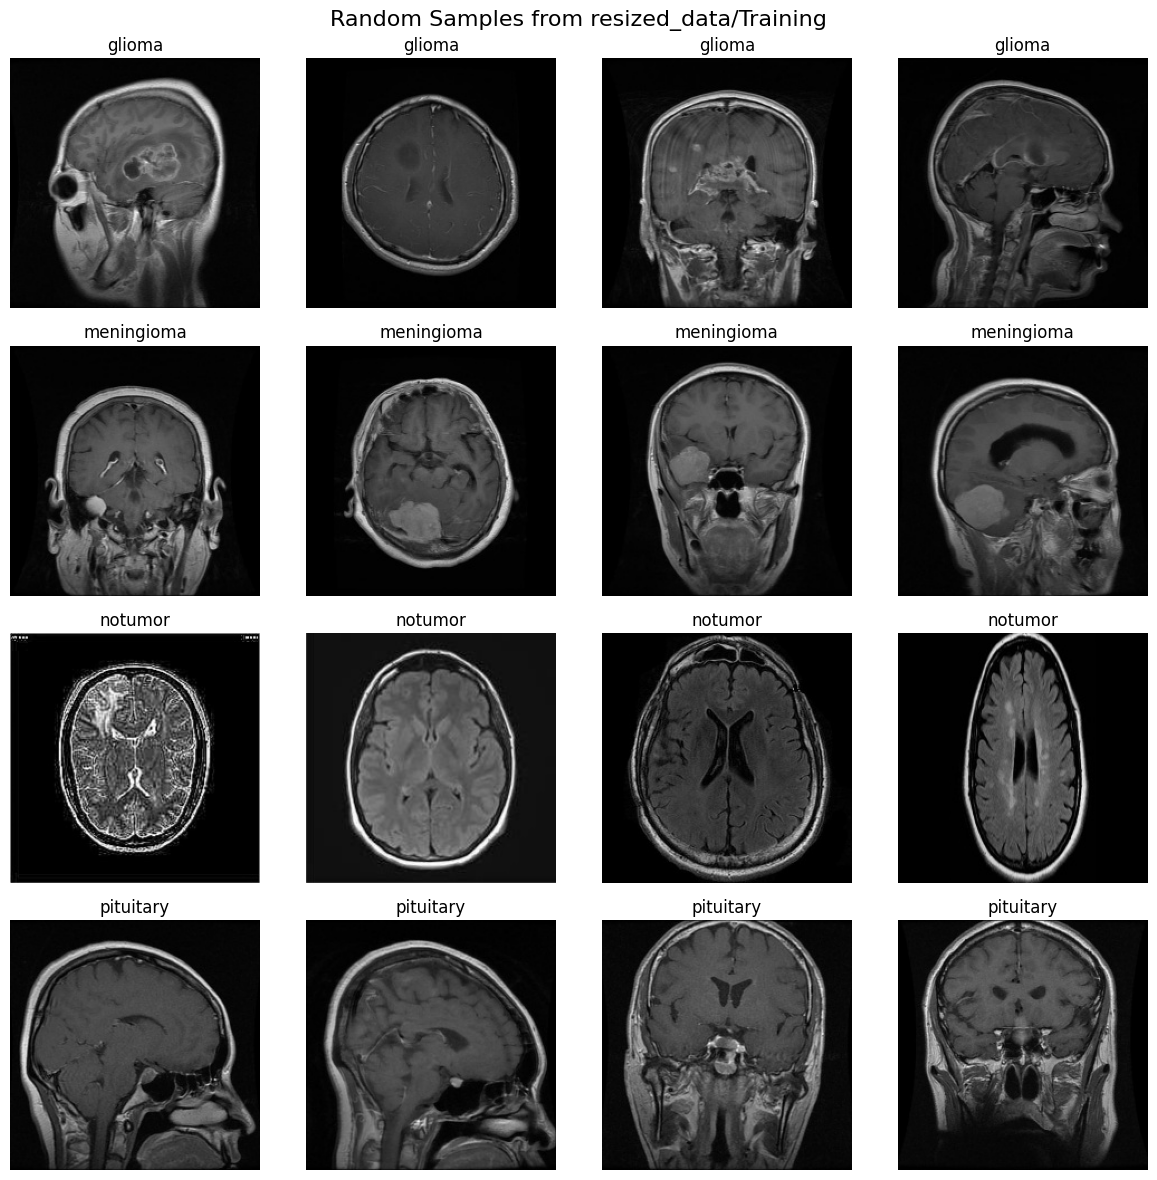

In [13]:
import random 

def display(resized_folder,categories,img_size=224,samples=4):
    fig , axes = plt.subplots(len(categories),samples,figsize=(samples*3,len(categories)*3))
    fig.suptitle(f"Random Samples from {resized_folder}",fontsize=16)
    for i , category in enumerate(categories):
        category_path = 'resized_data/Training/'+category
        images = os.listdir(category_path)
        samples_images = random.sample(images,samples)
        for j , image in enumerate(samples_images):
            img_path = os.path.join(category_path,image)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            axes[i,j].imshow(img)
            axes[i,j].set_title(f'{category}')
            axes[i,j].axis('off')
    plt.tight_layout()
    plt.show()

resized_folder = 'resized_data/Training'
display(resized_folder,categories) 

In [14]:


# Function to remove background from greyscale images
def remove_background(input_directory, output_directory):
    os.makedirs(output_directory, exist_ok=True)  # Create output directory if it doesn't exist

    # Loop through each label in the dataset
    for label in os.listdir(input_directory):
        label_dir = f'{input_directory}/{label}'
        output_label_dir = f'{output_directory}/{label}'
        os.makedirs(output_label_dir, exist_ok=True)  # Create subdirectory for processed images

        for filename in tqdm(os.listdir(label_dir), desc=f"Removing background for {label}"):
            if filename.endswith('.jpg'):
                img_path = f'{label_dir}/{filename}'
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as greyscale

               
                _, mask = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)

         
                contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                if contours:
                    
                    largest_contour = max(contours, key=cv2.contourArea)

                    x, y, w, h = cv2.boundingRect(largest_contour)

                    cropped_img = img[y:y+h, x:x+w]

                    
                    output_path = f'{output_label_dir}/{filename}'
                    cropped_img = cv2.resize(cropped_img, (img_size, img_size))
                    cv2.imwrite(output_path, cropped_img)


train_data_background_removed = 'background_removed_dataset/Training'
test_data_background_removed = 'background_removed_dataset/Testing'

remove_background(train_data_rezsized, train_data_background_removed)
remove_background(test_data_resized, test_data_background_removed)

Removing background for pituitary: 100%|██████████| 300/300 [00:00<00:00, 329.58it/s]


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array , load_img
from tqdm import tqdm

input_dir = 'background_removed_dataset/Training'
output_dir = 'augmented_data/Training'
target_count = 2000
img_size = 224

def augment_img(input_dir,output_dir,target_count,img_size):
    os.makedirs(output_dir,exist_ok=True)
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    for category in categories:
        category_dir = os.path.join(output_dir,category)
        os.makedirs(category_dir,exist_ok=True)
        folderPath = f'{input_dir}/{category}'
        images = os.listdir(folderPath)
        num_images = len(images)
        num_generated = 0
        print(f"Augmenting images for {category}")
        while num_generated < target_count:
            for image in images:
                img_path = f'{folderPath}/{image}'
                img = load_img(img_path)
                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)
                i = 0
                for batch in datagen.flow(x,batch_size=1,save_to_dir=category_dir,save_prefix='aug',save_format='jpg'):
                    num_generated += 1
                    i += 1
                    if i >= 1:
                        break
                    if num_generated >= target_count:
                        break
    print(f"Augmented images saved in {output_dir}")
augment_img(input_dir,output_dir,target_count,img_size)

Augmenting images for glioma
Augmenting images for meningioma
Augmenting images for notumor
Augmenting images for pituitary
Augmented images saved in augmented_data/Training


Image after augmentation:
glioma: 2311 images


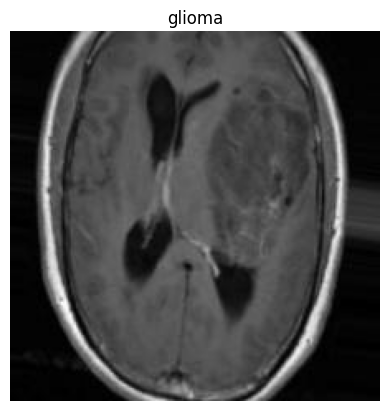

meningioma: 2370 images


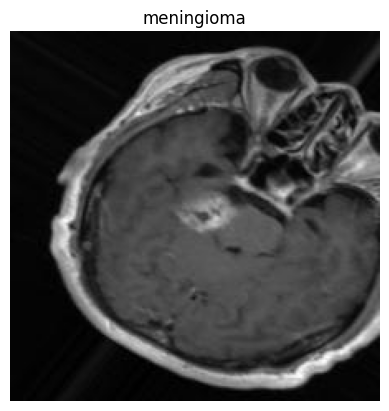

notumor: 2746 images


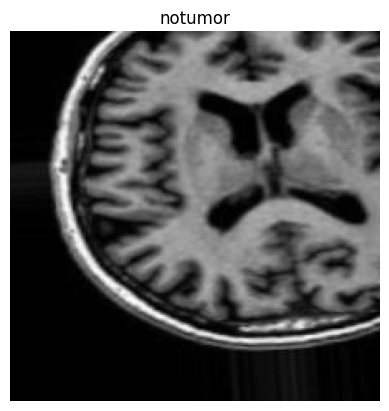

pituitary: 2528 images


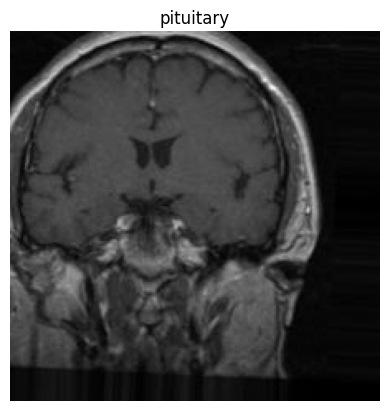

In [25]:
def check_images(directory):
    print("Image after augmentation:")
    for category in os.listdir(directory):
        category_dir = os.path.join(directory,category)
        images = os.listdir(category_dir)
        print(f"{category}: {len(images)} images")
        img = load_img(os.path.join(category_dir,images[0]))
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
        plt.show()

check_images(output_dir)

Displaying samples for category: glioma


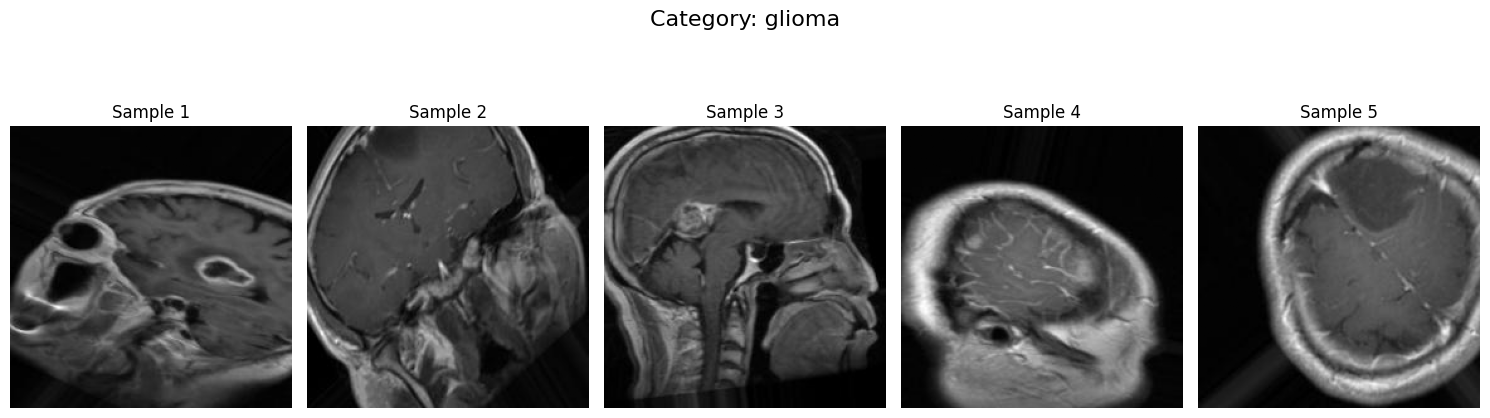

Displaying samples for category: meningioma


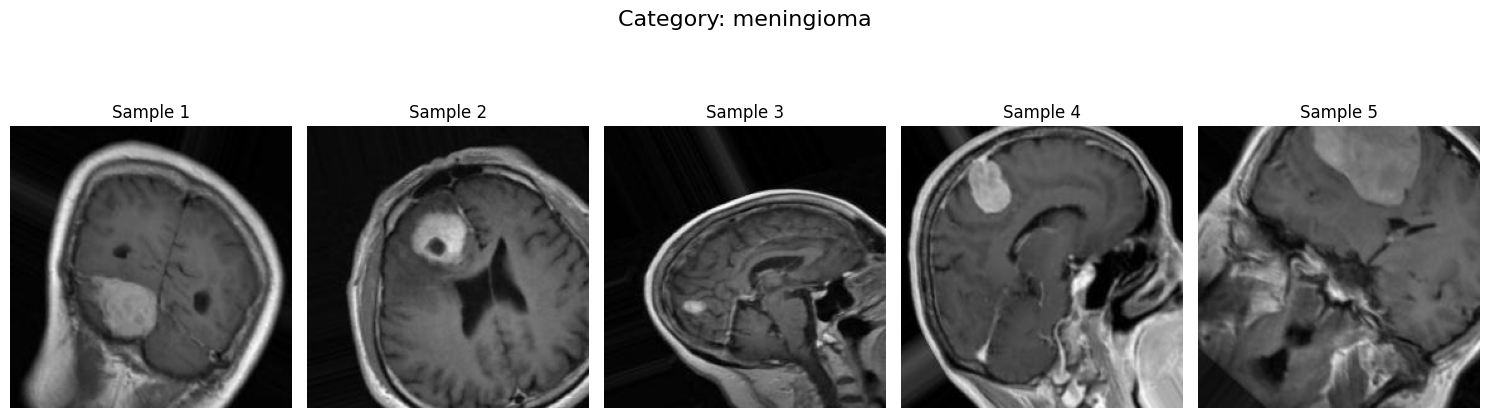

Displaying samples for category: notumor


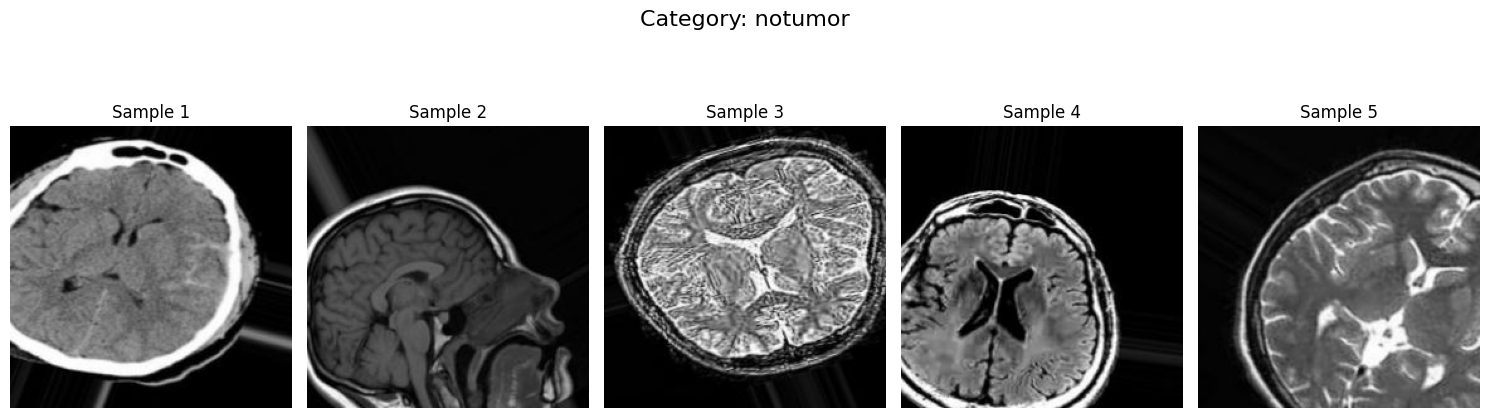

Displaying samples for category: pituitary


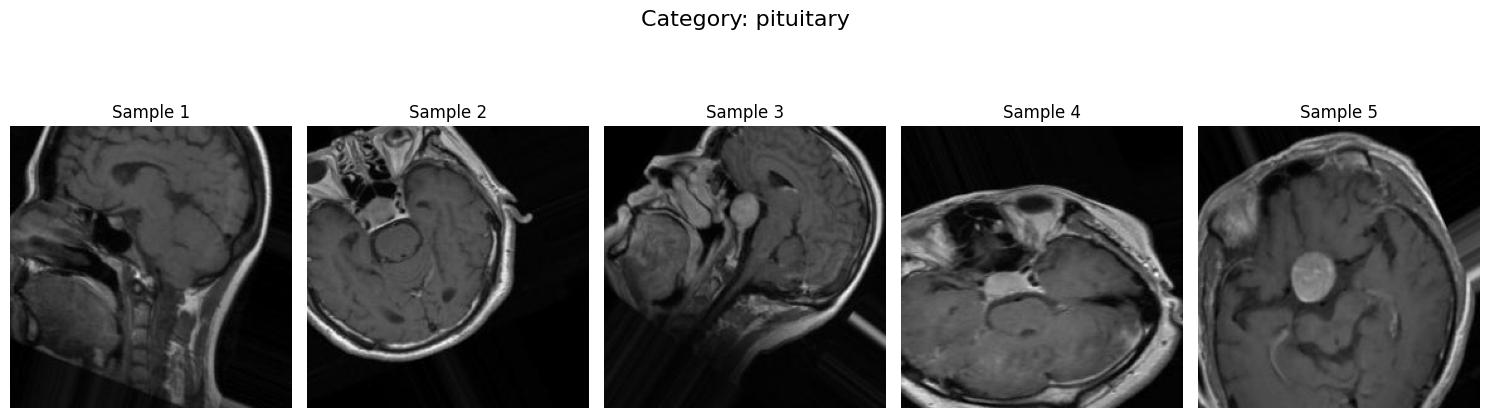

In [26]:
import os
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def display_augmented_samples(augmented_dir, num_samples=5, img_size=(150, 150)):
    """
    Displays random samples of augmented images from each category.

    Parameters:
    - augmented_dir (str): Path to the augmented dataset directory.
    - num_samples (int): Number of images to display per category.
    - img_size (tuple): Target size for loading images.

    Returns:
    - None: Displays the images using matplotlib.
    """
    categories = os.listdir(augmented_dir)

    for category in categories:
        category_path = os.path.join(augmented_dir, category)
        images = os.listdir(category_path)

        if len(images) == 0:
            print(f"No images found in category: {category}")
            continue

        print(f"Displaying samples for category: {category}")
        samples = random.sample(images, min(num_samples, len(images)))

        # Create a figure for the category
        plt.figure(figsize=(15, 5))
        plt.suptitle(f"Category: {category}", fontsize=16)

        for i, img_name in enumerate(samples):
            img_path = os.path.join(category_path, img_name)
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0  # Normalize for better visualization

            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img_array)
            plt.axis('off')
            plt.title(f"Sample {i + 1}")

        plt.tight_layout()
        plt.show()

num_samples = 5  # Number of images to display per category
img_size = (224, 224)  # Image size to display

# Display augmented images
display_augmented_samples(output_dir, num_samples, img_size)

In [30]:
import os
import shutil

def combine_images(original_dir, augmented_dir, combined_dir, min_count):
    """
    Combines original images and augmented images, ensuring each category has at least `min_count` images.

    Parameters:
    - original_dir (str): Path to the directory containing original images.
    - augmented_dir (str): Path to the directory containing augmented images.
    - combined_dir (str): Path to the directory where combined images will be saved.
    - min_count (int): Minimum number of images required in each category.

    Returns:
    - None: Prints the final image counts for each category.
    """
    os.makedirs(combined_dir, exist_ok=True)

    for category in os.listdir(original_dir):
        # Directories for each category
        original_category_dir = os.path.join(original_dir, category)
        augmented_category_dir = os.path.join(augmented_dir, category)
        combined_category_dir = os.path.join(combined_dir, category)
        os.makedirs(combined_category_dir, exist_ok=True)

        # Copy original images
        original_images = os.listdir(original_category_dir)
        for image in original_images:
            src = os.path.join(original_category_dir, image)
            dst = os.path.join(combined_category_dir, image)
            shutil.copy(src, dst)

        # Check if augmented directory exists
        if os.path.exists(augmented_category_dir):
            # Copy augmented images until the total count reaches `min_count`
            augmented_images = os.listdir(augmented_category_dir)
            total_count = len(original_images)
            for image in augmented_images:
                if total_count >= min_count:
                    break
                src = os.path.join(augmented_category_dir, image)
                dst = os.path.join(combined_category_dir, image)
                shutil.copy(src, dst)
                total_count += 1

        # Print final count for the category
        final_count = len(os.listdir(combined_category_dir))
        print(f"Category: {category}, Final Count: {final_count}")

# Define directories and parameters
original_dir = 'background_removed_dataset/Training'
augmented_dir = 'augmented_dataset/Training'
combined_dir = 'combined-dataset/Training'
min_count = 2000  # Minimum images required per category

# Combine images and ensure minimum count
combine_images(original_dir, augmented_dir, combined_dir, min_count)

Category: glioma, Final Count: 1321
Category: meningioma, Final Count: 1339
Category: notumor, Final Count: 1595
Category: pituitary, Final Count: 1457


In [31]:
from re import X
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Parameters
img_size = 224  
categories = ['glioma', 'notumor', 'pituitary', 'meningioma']

# Function to load images and corresponding labels
def load_images_and_labels(directory, categories, img_size):
    x_data = []
    y_labels = []

    for label, category in enumerate(categories):
        category_path = os.path.join(directory, category)
        for filename in tqdm(os.listdir(category_path), desc=f"Loading images for {category}"):
            if filename.endswith('.jpg'):
                img_path = os.path.join(category_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img_resized = cv2.resize(img, (img_size, img_size))
                    x_data.append(img_resized)
                    y_labels.append(label)

    return np.array(x_data), np.array(y_labels)

# Load training data
x_train, y_train = load_images_and_labels('combined-dataset/Training', categories, img_size)

# Load test data
X_test, y_test = load_images_and_labels(test_data_background_removed, categories, img_size)

# Split data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=66)

print(f"Training data count: {len(X_train)}")
print(f"Validation data count: {len(X_val)}")
print(f"Testing data count: {len(X_test)}")

Loading images for meningioma: 100%|██████████| 306/306 [00:03<00:00, 101.87it/s]


Training data count: 5140
Validation data count: 572
Testing data count: 1311


In [32]:
x_train_plot, y_train_plot = load_images_and_labels('../data/Training', categories, img_size)


Loading images for meningioma: 100%|██████████| 1339/1339 [00:01<00:00, 821.97it/s]


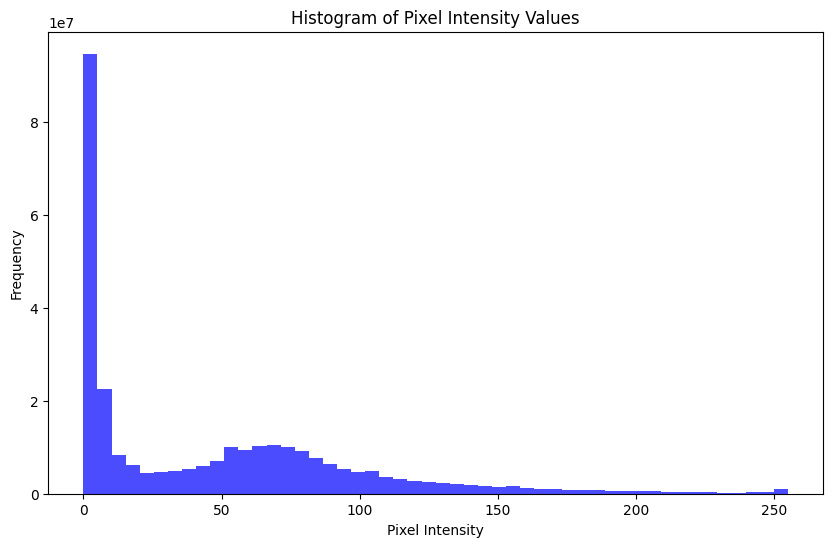

In [33]:
pixel_values = x_train_plot.flatten()
plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Pixel Intensity Values")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

In [34]:
import numpy as np

# Z-score normalization function
def z_score_normalize(data):
    mean = np.mean(data, axis=(0, 1, 2), keepdims=True) 
    std = np.std(data, axis=(0, 1, 2), keepdims=True)    
    return (data - mean) / std


X_train_norm = z_score_normalize(X_train)
X_val_norm = z_score_normalize(X_val)
X_test_norm = z_score_normalize(X_test)

print(f'X_train mean: {np.mean(X_train_norm):.2f}, std: {np.std(X_train_norm):.2f}')
print(f'X_val mean: {np.mean(X_val_norm):.2f}, std: {np.std(X_val_norm):.2f}')
print(f'X_test mean: {np.mean(X_test_norm):.2f}, std: {np.std(X_test_norm):.2f}')

X_train mean: -0.00, std: 1.00
X_val mean: 0.00, std: 1.00
X_test mean: 0.00, std: 1.00


In [35]:
X_train_norm = np.expand_dims(X_train_norm, axis=-1)  #s (6144, 224, 224, 1)
X_val_norm = np.expand_dims(X_val_norm, axis=-1)      #(1536, 224, 224, 1)
X_test_norm = np.expand_dims(X_test_norm, axis=-1)

print("X_train_norm: ", X_train_norm.shape)
print("X_val_norm: ", X_val_norm.shape)
print("X_test_norm: ", X_test_norm.shape)

X_train_norm:  (5140, 224, 224, 1)
X_val_norm:  (572, 224, 224, 1)
X_test_norm:  (1311, 224, 224, 1)


In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import numpy as np

base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= (img_size, img_size, 3), pooling= 'max')

base_model.trainable = False

inputs = layers.Input(shape = (img_size, img_size, 1))

x = base_model(inputs)

x = layers.Flatten()(x)

x = layers.Dropout(rate= 0.3)(x)
x = layers.Dense(128, activation= 'relu')(x)
x = layers.Dropout(rate= 0.25)(x)
x = layers.Dense(4, activation= 'softmax')(x)
    
model = models.Model(inputs, x)

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [37]:
X_train_rgb = np.repeat(X_train_norm, 3, axis=-1)  # Repeat along the last axis
X_val_rgb = np.repeat(X_val_norm, 3, axis=-1)      # Repeat along the last axis


In [38]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
class_weights

{0: np.float64(1.080740117746005),
 1: np.float64(0.8868184955141477),
 2: np.float64(0.9831675592960979),
 3: np.float64(1.0753138075313808)}

In [39]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np

img_size = 224 
batch_size = 32  
num_classes = 4  
l2_reg = 0.00001  

model = models.Sequential()


model.add(layers.Input(shape=(img_size, img_size, 1)))


model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))  

model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))  

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))  

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2)) 

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2)) 


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(num_classes, activation='softmax')) 


initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,020,260 (7.71 MB)

 Trainable params: 2,020,260 (7.71 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
X_train_norm.shape

(5140, 224, 224, 1)

In [41]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint,EarlyStopping

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  
    factor=0.5,         
    patience=3,         
    min_lr=1e-6,        
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',   
    patience=3,            
    restore_best_weights=True,  
    verbose=1
)


history = model.fit(
    X_train_norm, y_train,
    validation_data=(X_val_norm, y_val),
    epochs=30,
    batch_size=batch_size,
    
    verbose=1
)

Epoch 1/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 74s 297ms/step - accuracy: 0.4384 - loss: 1.1876 - val_accuracy: 0.6888 - val_loss: 0.9794
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 47s 293ms/step - accuracy: 0.6533 - loss: 0.8408 - val_accuracy: 0.7780 - val_loss: 0.7236
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 49s 301ms/step - accuracy: 0.7476 - loss: 0.6620 - val_accuracy: 0.8322 - val_loss: 0.6150
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 51s 315ms/step - accuracy: 0.7759 - loss: 0.5818 - val_accuracy: 0.8409 - val_loss: 0.5381
Epoch 5/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 51s 318ms/step - accuracy: 0.7964 - loss: 0.5310 - val_accuracy: 0.8689 - val_loss: 0.4388
Epoch 6/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 52s 321ms/step - accuracy: 0.8164 - loss: 0.4974 - val_accuracy: 0.8671 - val_loss: 0.4028
Epoch 7/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 51s 319ms/step - accuracy: 0.8527 - loss: 0.4199 - val_accuracy: 0.8776 - val_loss: 0.3953
Epoch 8/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 50s 310ms/step - accuracy: 0.8572 - loss: 0

In [47]:

test_loss, test_accuracy = model.evaluate(X_test_norm, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


y_pred = model.predict(X_test_norm)
y_pred_classes = np.argmax(y_pred, axis=1)  

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.9086 - loss: 0.2190
Test Loss: 0.1655
Test Accuracy: 0.9367
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step


Confusion Matrix:
[[260   0   2  38]
 [  0 393   0  12]
 [  7   0 285   8]
 [  3  12   1 290]]


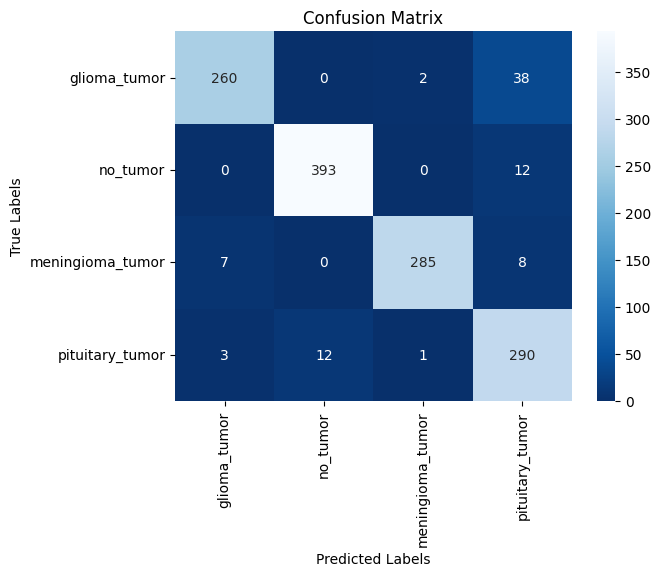

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.96      0.87      0.91       300
        no_tumor       0.97      0.97      0.97       405
meningioma_tumor       0.99      0.95      0.97       300
 pituitary_tumor       0.83      0.95      0.89       306

        accuracy                           0.94      1311
       macro avg       0.94      0.93      0.93      1311
    weighted avg       0.94      0.94      0.94      1311



In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r', xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


report = classification_report(y_test, y_pred_classes, target_names=labels)
print("Classification Report:")
print(report)

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,060,782 (23.12 MB)

 Trainable params: 2,020,260 (7.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,040,522 (15.41 MB)